#Aprendizaje de Máquina: K-Nearest Neighbors

https://ronaldnhondova.com/?rara-portfolio=bias-variance-trade-off-in-with-knns

##Compensación entre sesgo y varianza I: Entendiendo la compensación

Este ejercicio ilustrará el impacto de la compensación entre sesgo y varianza en el rendimiento del clasificador analizando los límites de decisión del clasificador.



1.   Cree un conjunto de datos sintéticos (con características y objetivos). Utilice el módulo make_moons con el parámetro noise=0.35 para generar 1000 muestras aleatorias.
2.   Grafique sus muestras aleatorias con cada clase en un color diferente.
3.   Cree 3 subconjuntos de datos diferentes seleccionando 100 de los 1000 puntos de datos al azar tres veces. Para cada uno de estos conjuntos de datos de 100 muestras, ajuste tres clasificadores k-Nearest Neighbor con: k={1,25,50}. Esto dará como resultado 9 combinaciones (3 conjuntos de datos, con 3 clasificadores entrenados).
4.   Para cada combinación de conjunto de datos con clasificador entrenado, en una cuadrícula de 3 por 3, trace el límite de decisión (similar en estilo a la Figura 2.15 de Introducción al Aprendizaje Estadístico). Cada columna debe representar un valor diferente de k   y cada fila debe representar un conjunto de datos diferente.
5.   ¿Qué observa en la diferencia entre las filas y las columnas? ¿Qué límites de decisión parecen separar mejor las dos clases de datos? ¿Qué límites de decisión varían más a medida que cambian los datos?
6.   Explique el equilibrio sesgo-varianza utilizando el ejemplo de los gráficos que ha realizado en este ejercicio.

In [ ]:
# 1

from sklearn import datasets
random.seed(123456)
dataset_q5 = datasets.make_moons(n_samples=1000,noise=0.35)

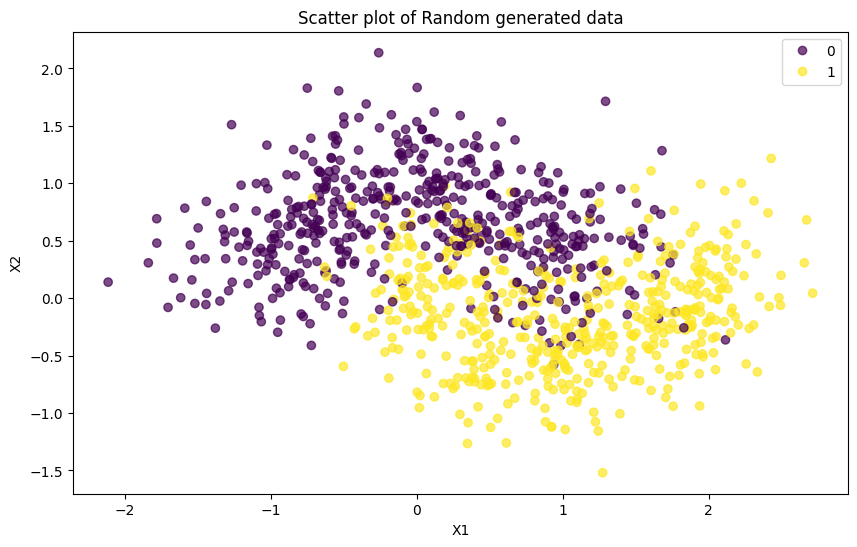

In [ ]:
# 2

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6), dpi= 100)
ax = plt.scatter(x=dataset_q5[0][:,0],y=dataset_q5[0][:,1],c=dataset_q5[1],alpha =0.7,label=dataset_q5[1])
plt.legend(handles=ax.legend_elements()[0], labels=['0','1'])
plt.title('Scatter plot of Random generated data')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [ ]:
# 3

import random
#random.choices()
#dataset_q5[0]
random.seed(123)
set1_ind = random.sample(range(0,1000),100)
set1_x = dataset_q5[0][set1_ind]
set1_y = dataset_q5[1][set1_ind]

random.seed(1234)
set2_ind = random.sample(range(0,1000),100)
set2_x = dataset_q5[0][set2_ind]
set2_y = dataset_q5[1][set2_ind]

random.seed(12345)
set3_ind = random.sample(range(0,1000),100)
set3_x = dataset_q5[0][set3_ind]
set3_y = dataset_q5[1][set3_ind]

In [ ]:
# 4

from sklearn.neighbors import KNeighborsClassifier
random.seed(123456)
for j in [1,2,3]:
    for i in [1,25,50]:
        exec("knn_set%s_%s=KNeighborsClassifier(n_neighbors=%s)" % (j,i,i))
        exec("knn_set%s_%s.fit(set%s_x,set%s_y)" % (j,i,j,j))

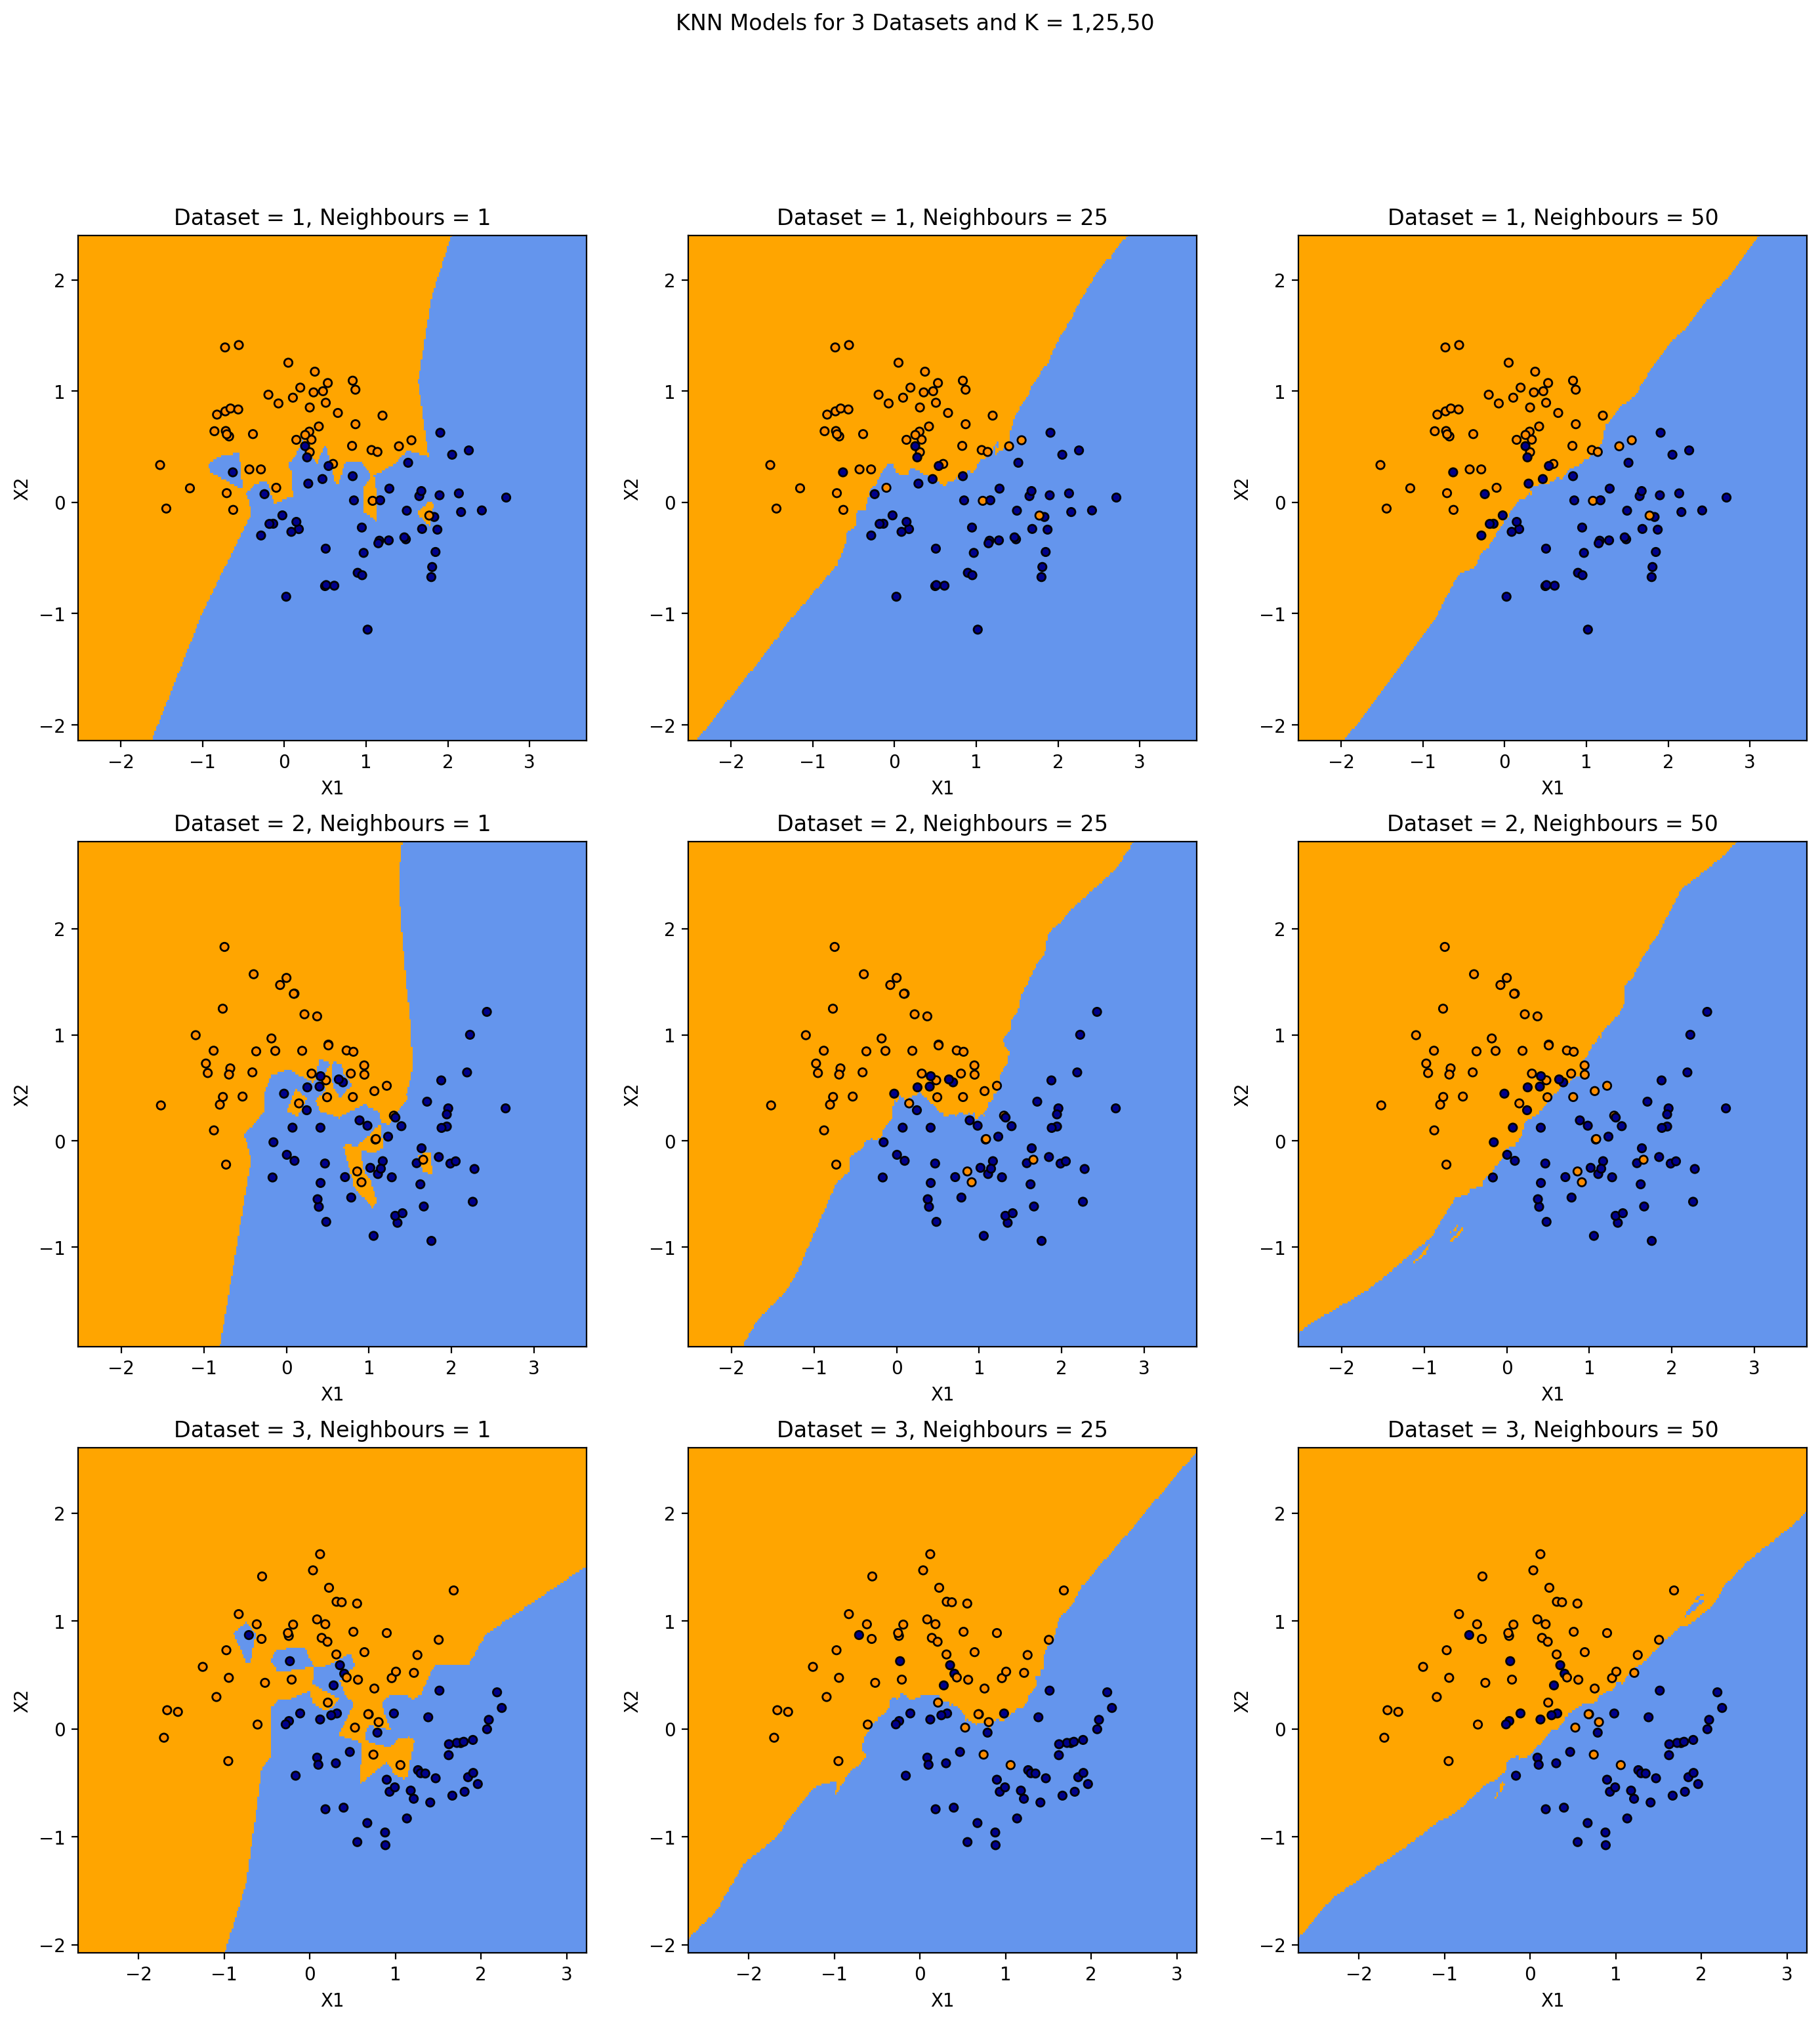

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
%config InlineBackend.figure_format = 'retina' # Makes the plots clear on high-res screens

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['orange', 'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'darkblue'])

subplt = 0
fig, axs = plt.subplots(3,3,figsize=(17,17))

for j in [1,2,3]:
    subplt = 0
    for i in [1,25,50]:

        exec("x_min, x_max = set%s_x[:, 0].min() - 1, set%s_x[:, 0].max() + 1" % (j,j))
        exec("y_min, y_max = set%s_x[:, 1].min() - 1, set%s_x[:, 1].max() + 1" % (j,j))

        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

        exec("Z = knn_set%s_%s.predict(np.c_[xx.ravel(), yy.ravel()])" % (j,i))

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        axs[j-1,subplt].pcolormesh(xx, yy, Z, cmap=cmap_light)

        # Plot also the training points
        exec("axs[j-1,subplt].scatter(set%s_x[:, 0], set%s_x[:, 1], c=set%s_y, cmap=cmap_bold,edgecolor='k', s=20)"\
             %(j,j,j))
        axs[j-1,subplt].set_xlim([xx.min(), xx.max()])
        axs[j-1,subplt].set_ylim([yy.min(), yy.max()])
        axs[j-1,subplt].set(title="Dataset = %i, Neighbours = %s" % (j, i),xlabel='X1',ylabel='X2')
        subplt = subplt + 1

fig.suptitle('KNN Models for 3 Datasets and K = 1,25,50')
plt.show()

##5

A medida que se desplaza por las filas (aumentando K), aumenta el sub-ajuste. Bajando por las columnas, la varianza en el límite de decisión es alta para K=1, pero se reduce a medida que K aumenta. K=1 parece hacer el mejor trabajo a la hora de separar las dos clases, pero a costa de una alta varianza. Por otro lado, K=25 parece ofrecer el mejor equilibrio entre la estabilidad del límite de decisión y la separación de las dos clases.

##6

El equilibrio Sesgo-Varianza es el reto de intentar minimizar el error global de generalización. A medida que un modelo reduce el sesgo o sub-ajuste, que se desplaza por las filas (con K=1 con el sesgo más bajo), se ajustará más a los datos. El resultado o compensación será un aumento de la varianza en el límite de decisión, como se muestra en la columna con K=1, que se desplaza hacia abajo en los diferentes conjuntos de datos.

##Compensación entre sesgo y varianza II: Cuantificando la compensación.

Este ejercicio explorará el impacto de la compensación sesgo-varianza en el rendimiento del clasificador analizando los límites de decisión del clasificador. En este caso, el valor de k determina la flexibilidad de nuestro modelo.



1.   Utilizando la función creada anteriormente para generar muestras aleatorias (utilizando la función make_moons), cree un nuevo conjunto de 1000 muestras aleatorias, y llame a este conjunto de datos su conjunto de prueba y al conjunto de datos creado anteriormente su conjunto de entrenamiento.
2.   Entrene un clasificador kNN en su conjunto de entrenamiento para k=1,2,...500. Aplique cada uno de estos clasificadores entrenados a su conjunto de datos de entrenamiento y a su conjunto de datos de prueba y trace el error de clasificación (fracción de puntos de datos mal etiquetados).
3.   ¿Qué tendencia observas en los resultados?
4.   ¿Qué valores de k representan un alto sesgo y cuáles una alta varianza?
5.   ¿Cuál es el valor óptimo de k   y ¿por qué?
6.   En los clasificadores kNN, el valor de k controla la flexibilidad del modelo - ¿qué controla la flexibilidad de otros modelos?

In [ ]:
# 1

random.seed(123456)
dataset_q7 = datasets.make_moons(n_samples=1000,noise=0.35)
test_x = dataset_q7[0]
test_y = dataset_q7[1]

train_x = dataset_q5[0]
train_y = dataset_q5[1]

In [ ]:
# 2

from sklearn.neighbors import KNeighborsClassifier
y_hat_test = []
y_hat_train = []
min_test_error = 1
min_test_error_k = 0
random.seed(123456)
for j in range(1,501):
    exec("knn_%s=KNeighborsClassifier(n_neighbors=%s)" % (j,j))
    exec("knn_%s.fit(train_x,train_y)" % (j))
    exec("y_hat_test.append(1-knn_%s.score(test_x,test_y))" % (j))
    exec("y_hat_train.append(1-knn_%s.score(train_x,train_y))" % (j))
    if y_hat_test[-1] < min_test_error:
        min_test_error = y_hat_test[-1]
        min_test_error_k = j

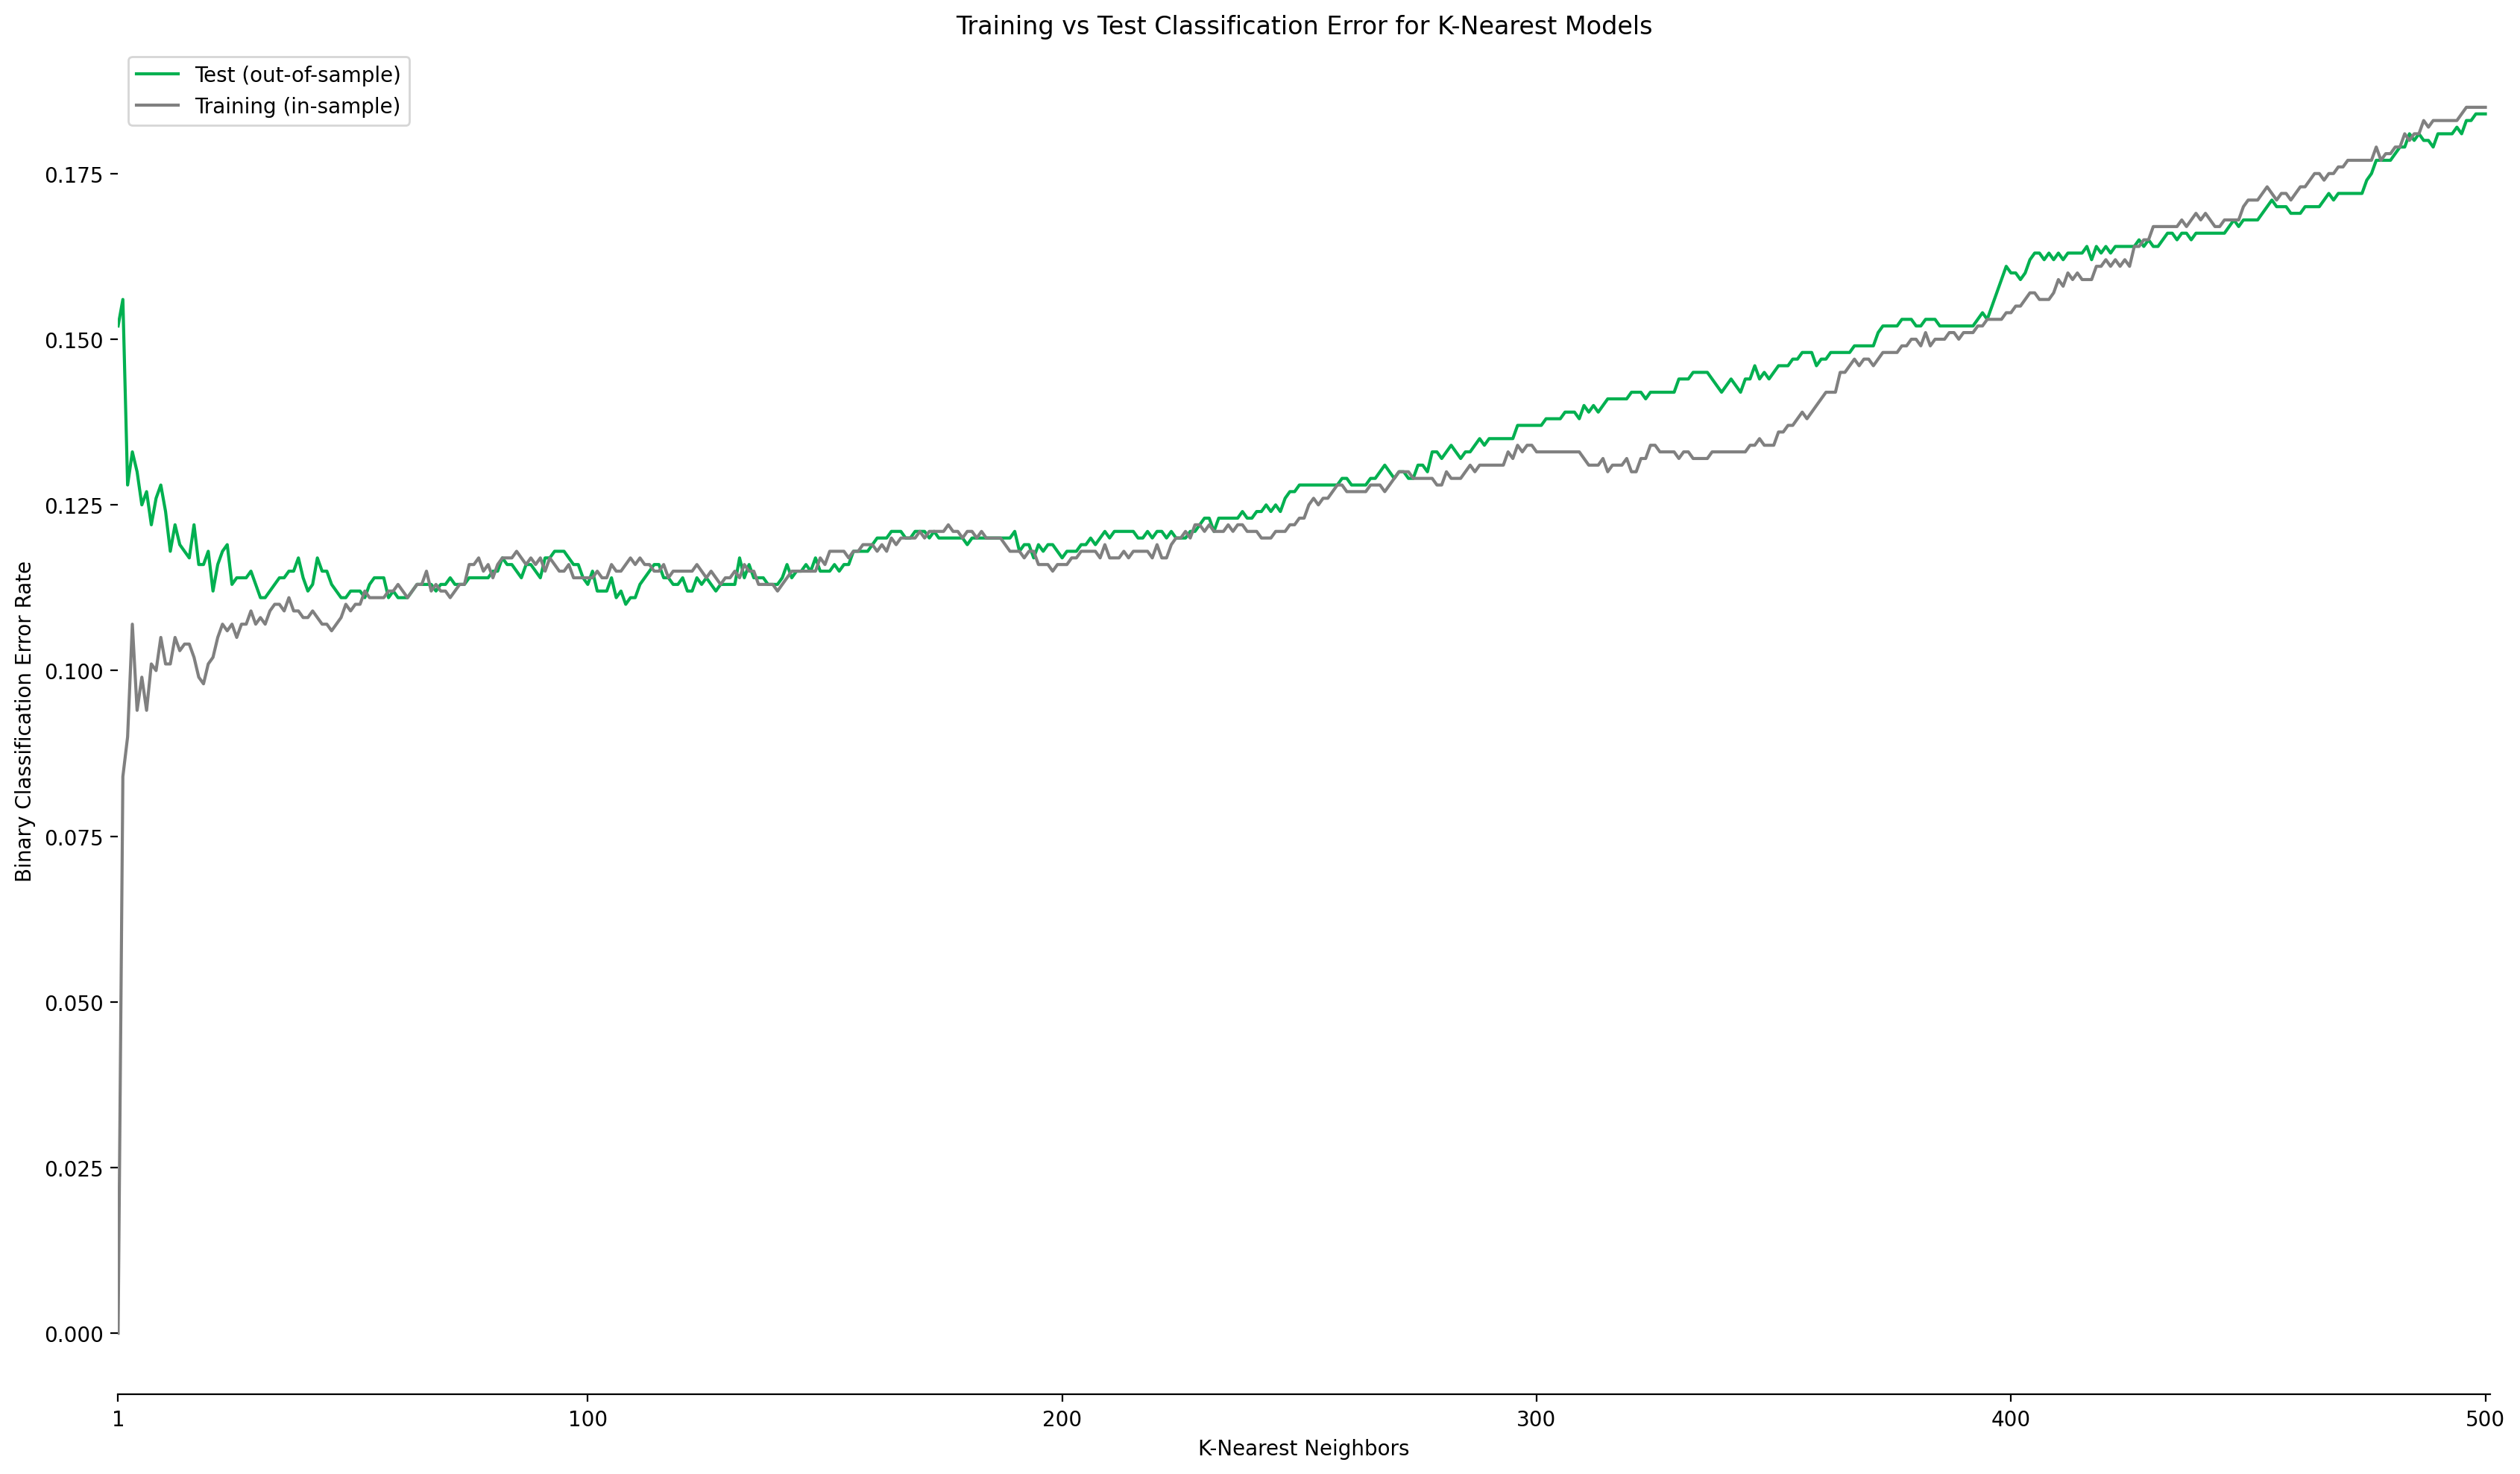

In [ ]:
import numpy as np
%config InlineBackend.figure_format = 'retina' # Makes the plots clear on high-res screens

#plot colors
color0 = '#121619' # Dark grey
color1 = '#00B050' # Green

# Create the plot
plt.figure(figsize=(17,10), dpi= 100) # Adjust the figure size and dpi (dots per inch)
                                    # to clearly display the plot and balance plot proportions

plt.plot(range(1,501),y_hat_test,color=color1,label='Test (out-of-sample)')
plt.plot(range(1,501),y_hat_train,color='grey',label='Training (in-sample)')
plt.xlim(1, 501)
plt.xticks((1,100,200,300,400,500))

# Hide the right and top spines
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.legend()
plt.title('Training vs Test Classification Error for K-Nearest Models')
plt.xlabel('K-Nearest Neighbors')
plt.ylabel('Binary Classification Error Rate')
plt.tight_layout()
plt.show()

##3

Parece que el error de prueba empieza a disminuir en general a medida que K aumenta, pero hasta un K óptimo. En la región en la que el error de prueba disminuye, el error de entrenamiento parece ser significativamente menor, posiblemente debido a los efectos del sobreajuste en esa región. A medida que aumenta K, los errores de prueba y entrenamiento empiezan a converger, lo que refleja la reducción del sobreajuste. A medida que K aumenta, tanto la tasa de error de prueba como la de entrenamiento empiezan a aumentar de nuevo, debido a la falta de adaptación.

##4

Los valores de K más cercanos a 1 tienen mayor varianza y los valores mayores de K (por ejemplo, superiores a 100) tienen más sesgo.

In [ ]:
# 5

print('Optimal value of K is: %.0f, because it has the lowest test error.' % min_test_error_k)

Optimal value of K is: 108, because it has the lowest test error.


##6

En otros modelos, el número de parámetros controla la flexibilidad. A medida que aumente el número de parámetros, el modelo será más flexible, ya que dispondrá de más apalancamiento para sintonizar el rendimiento.